In [1]:
import numpy as np
import pandas as pd
import os
import pickle
import sys
%matplotlib inline

In [2]:
with open('Table1.pkl', 'rb') as f: # load pickle
    df = pickle.load(f)
    f.close()
df.head(2)

,deidentifiedSpecimenName,diseaseOntology,MSIstatus,gene1_RE,gene2_RE,Gene1_Breakpoint1,Gene2_Breakpoint1,Junction Sequence 1,Gene1_Breakpoint2,Gene2_Breakpoint2,Junction Sequence 2
0,XRN:6SJTT7,colon adenocarcinoma (crc),MSI-H,RET,TRIM24,chr10:43611914,chr7:138268067,AAGAAAAAAATCTAGATGATTAAGAGGAAATATGTGAAGACAAGTT...,-,-,-
1,XRN:DNF6WD,colon adenocarcinoma (crc),MSS,BRAF,TRIM24,chr7:140489429,chr7:138253092,AACTTTCCATTCTTGAGAGCTTACAATCTCATGGGAAGTAAGATGC...,chr7:140489430,chr7:138253093,AAAAAAAAAAAAAAAAAAGGAGGCCAGGTACGGTGGCTTACGAGTT...


In [3]:
dt = df[['MSIstatus','gene1_RE', 'gene2_RE']]
#dt = dt[dt['MSIstatus'] != 'MSI ambiguous']
dt_MSS = dt[dt['MSIstatus'] == 'MSS']
dt_MSI = dt[dt['MSIstatus'] == 'MSI-H']
dt_MSI.head()

,MSIstatus,gene1_RE,gene2_RE
0,MSI-H,RET,TRIM24
4,MSI-H,NTRK1,TPM3
5,MSI-H,NTRK1,TPM3
6,MSI-H,NTRK1,TPM3
7,MSI-H,NTRK1,TPM3


In [14]:
dt_MSI.gene1_RE[0]
dt_MSI.gene2_RE.unique()

array(['TRIM24', 'TPM3', 'TPR', 'PLEKHA6', 'LMNA', 'IRF2BP2', 'TPM1',
       'CCDC88C', 'CIT', 'ZNF608', 'POF1B', 'NCOA4', 'SNRNP70', 'CCDC6',
       'TNIP2', 'NTRK3', 'ETV6', 'EML4', 'SLMAP', 'STRN', 'DIAPH2',
       'GKAP1', 'TARDBP', 'AGAP3', 'AKAP9', 'CUL1'], dtype=object)

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


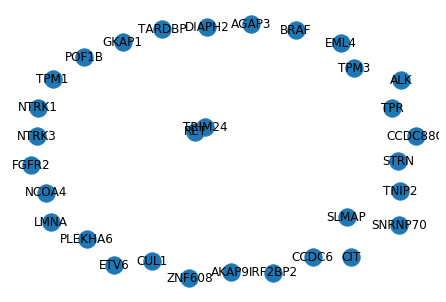

In [19]:
G = nx.Graph()
G.add_nodes_from(dt_MSI.gene1_RE.unique(), bipartite=0)
G.add_nodes_from(dt_MSI.gene2_RE.unique(), bipartite=1)

for i in range(len(dt_MSI)):
    print(i)

G.add_edge(dt_MSI.gene1_RE[0], dt_MSI.gene2_RE[0])

pos = nx.spring_layout(G) # Layout algorithm
nx.draw(G, with_labels = True) # Draw the graph
plt.show()

In [18]:
nx.is_connected(G)
G.edges()

EdgeView([('RET', 'TRIM24')])

## 去重行

In [27]:
dg = dt[dt.duplicated(['MSIstatus','gene1_RE', 'gene2_RE'],keep='last')]
dg.head()

,MSIstatus,gene1_RE,gene2_RE
0,MSI-H,RET,TRIM24
1,MSS,BRAF,TRIM24
4,MSI-H,NTRK1,TPM3
5,MSI-H,NTRK1,TPM3
6,MSI-H,NTRK1,TPM3


In [37]:
#dt.groupby(dt.columns.tolist(),as_index=False).size()
dt_MSI.groupby(['gene1_RE', 'gene2_RE'], as_index=False).size()

gene1_RE  gene2_RE
ALK       DIAPH2       1
          EML4         2
          SLMAP        1
          STRN         3
BRAF      AGAP3        3
          AKAP9        2
          CUL1         3
          GKAP1        1
          TARDBP       1
          TRIM24       6
ETV6      NTRK3        1
FGFR2     CIT          1
          POF1B        2
          ZNF608       1
NTRK1     CCDC88C      1
          IRF2BP2      1
          LMNA        10
          PLEKHA6      2
          TPM1         1
          TPM3        20
          TPR          4
NTRK3     ETV6         4
RET       CCDC6        4
          NCOA4       12
          SNRNP70      1
          TNIP2        1
          TRIM24       3
dtype: int64

In [54]:
tmp = dt_MSI.groupby(['gene1_RE', 'gene2_RE']).size().reset_index().rename(columns={0:'records'})
type(tmp)
tmp

,gene1_RE,gene2_RE,records
0,ALK,DIAPH2,1
1,ALK,EML4,2
2,ALK,SLMAP,1
3,ALK,STRN,3
4,BRAF,AGAP3,3
5,BRAF,AKAP9,2
6,BRAF,CUL1,3
7,BRAF,GKAP1,1
8,BRAF,TARDBP,1
9,BRAF,TRIM24,6


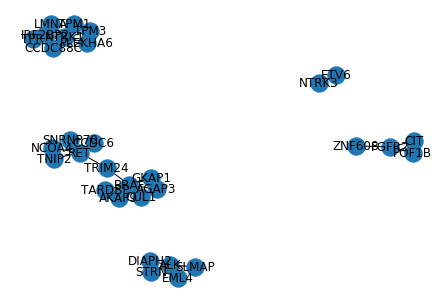

In [51]:
G = nx.Graph()
G.add_nodes_from(tmp.gene1_RE.unique(), bipartite=0)
G.add_nodes_from(tmp.gene2_RE.unique(), bipartite=1)

for i in range(len(tmp)):
    G.add_edge(tmp.gene1_RE[i], tmp.gene2_RE[i])

pos = nx.spring_layout(G) # Layout algorithm
nx.draw(G, with_labels = True) # Draw the graph
plt.show()